画每个不确定性量化的展示图，暂定 pems04 graphwavenet
date:20221102

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('../../PEMS04/PEMS04.csv').values

In [2]:
groundtruth = np.load('save/pred_PEMS04_GraphWaveNet_dropout_2211022007/GraphWaveNet_groundtruth.npy')
lower = np.load('save/pred_PEMS04_GraphWaveNet_dropout_2211022007/GraphWaveNet_lower.npy')
upper = np.load('save/pred_PEMS04_GraphWaveNet_dropout_2211022007/GraphWaveNet_upper.npy')

print(groundtruth.shape)

In [13]:
def remove_moving_window(speed):

    batch_num, n_pred, n_node = speed.shape
    select_idx = np.arange(0, batch_num, n_pred)
    speed = speed[select_idx, :, :]

    speed = np.reshape(speed, (-1, n_node))
    print(speed.shape)

    return speed

In [14]:
groundtruth = remove_moving_window(groundtruth)
lower = remove_moving_window(lower)
upper = remove_moving_window(upper)


(8496, 307)
(8496, 307)
(8496, 307)


In [22]:
np.where(np.sum(groundtruth < 5, axis=0) == 0)

(array([  5,  15,  29,  32,  33,  39,  40,  41,  48,  49,  52,  53,  58,
         59,  61,  65,  67,  68,  69,  72,  75,  77,  80,  81,  82,  86,
         87,  88,  89,  95,  97,  98,  99, 101, 103, 108, 109, 110, 111,
        119, 120, 121, 122, 123, 124, 129, 137, 138, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170,
        171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
        185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
        198, 199, 200, 204, 207, 210, 211, 212, 214, 220, 221, 228, 230,
        231, 234, 235, 236, 238, 239, 248, 250, 251, 252, 254, 258, 260,
        261, 262, 263, 267, 268, 269, 272, 274, 284, 290, 293, 294, 295,
        296, 298, 300, 301]),)

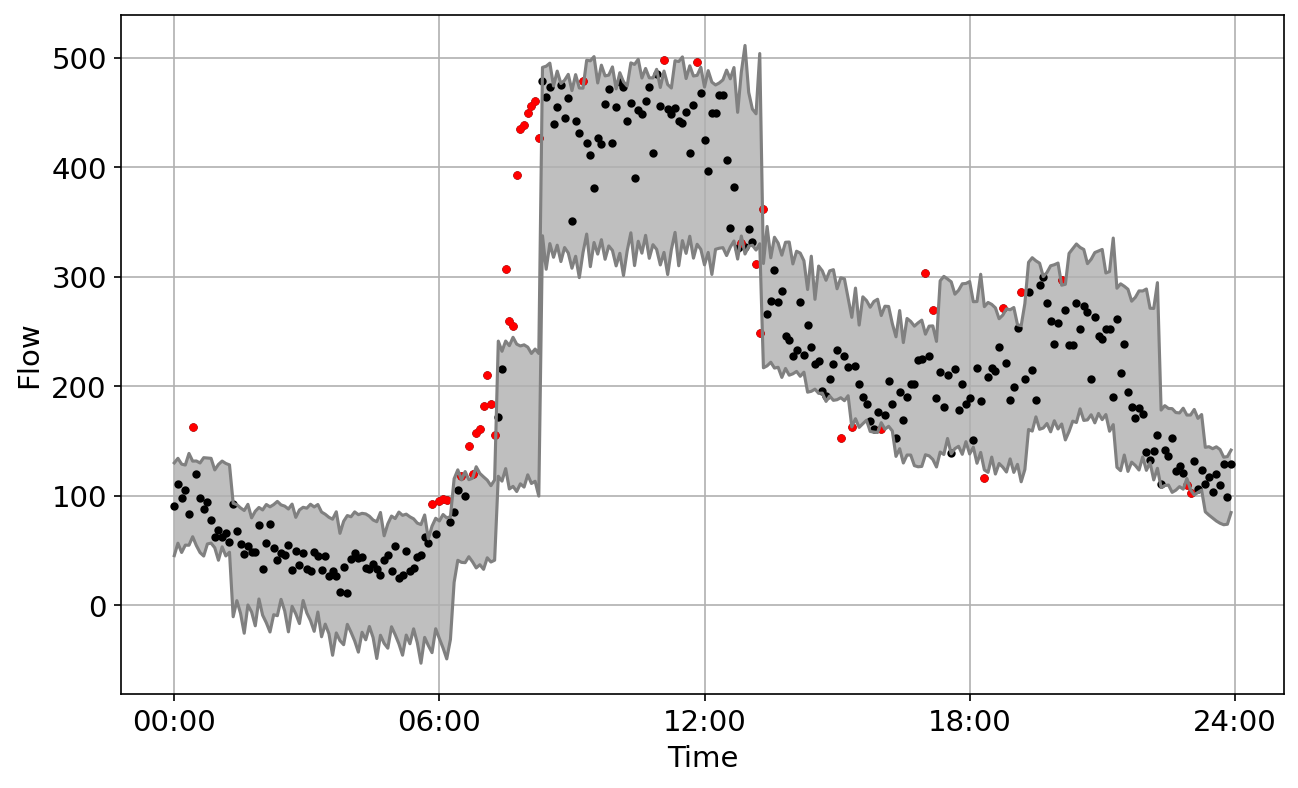

In [45]:
plot_day_len = 1
plot_start = (288 - int(groundtruth.shape[0]*0.8) % 288) + 288 * 0
plot_sensor_id = 1


fontsize = 14
x_ticks_pos = np.linspace(0, 288, 5)
x_tick_labels = ['00:00', '06:00', '12:00', '18:00', '24:00']

fig, ax = plt.subplots(figsize=(10, 6), dpi=150)
plt.cla()

x_range = np.arange(plot_day_len * 288)

# plot ground truth
plot_groundtruth = groundtruth[plot_start : plot_day_len*288 + plot_start, plot_sensor_id]
ax.plot(plot_groundtruth, '.', color = 'black', label='GroundTruth')

# find outliner
out_idx = np.where(
    (plot_groundtruth < lower[plot_start : plot_day_len*288 + plot_start, plot_sensor_id] ) | (
    upper[plot_start : plot_day_len*288 + plot_start, plot_sensor_id] < plot_groundtruth)
    )
ax.plot(x_range[out_idx], plot_groundtruth[out_idx],'.', color = 'red', label='GroundTruth')

ax.plot(lower[plot_start : plot_day_len*288 + plot_start, plot_sensor_id],linestyle = '-', color = 'grey')
ax.plot(upper[plot_start : plot_day_len*288 + plot_start, plot_sensor_id],linestyle = '-', color = 'grey')
ax.fill_between(
    x_range,
    lower[plot_start : plot_day_len*288 + plot_start, plot_sensor_id],
    upper[plot_start : plot_day_len*288 + plot_start, plot_sensor_id],
    facecolor = 'grey', alpha = 0.5
)



ax.set_xticks(x_ticks_pos)
ax.set_xticklabels(x_tick_labels)

ax.set_xlabel('Time', fontsize=fontsize)
ax.set_ylabel('Flow', fontsize=fontsize)

plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)

ax.grid()

# ax.legend(fontsize=fontsize)

# fig.show()
